In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation_tool import DRN
DRN = DRN(propagation_model='DIFF.BRK', init_particles = ['DM Antiprotons', 'Secondary Antiprotons', 'Protons', 'Deuterium', 'Helium'])


DRN Info: The simulation tool has been initiated.



**First Example: Antiproton fluxes with DM component**

In [2]:
# Initialize parameters for simulation inputs

test_mDM = np.array([10, 100, 1000])

test_fs = np.ones((3, 8))* 1/8 #equal branching fractions

test_pp = np.array([2.34, 2.28, 3.63e+28, -0.66, 0.52, -0.15, 3.83e+3, 0.4, 2.05e+5, 0.21]) # DIFF.BRK propagation model with arbitrary values
test_pp = np.repeat([test_pp], 3, axis = 0)


DRN Info: No value was given for the annihilation cross section. It will be set to default (<sigma v> = 3 * 10^-26 cm^3 s^-1).


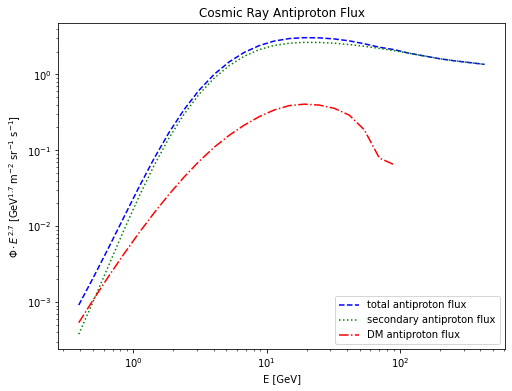

In [3]:
# Extract the desired output spectra and plot them for one DM mass

out = DRN.predict(["DM Antiprotons", "Secondary Antiprotons"], test_pp[0], DM_mass= test_mDM[1], DM_fs = test_fs[1])

DM_flux, DM_E = out[0]
S_flux, S_E = out[1]

plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Antiproton Flux')
plt.plot(DM_E, DM_E**2.7 * (DM_flux + S_flux), c = 'b', linestyle = 'dashed', label = 'total antiproton flux')
plt.plot(S_E, S_E**2.7 * S_flux, c = 'g', linestyle = 'dotted', label = 'secondary antiproton flux')
plt.plot(DM_E[DM_E<test_mDM[1]], (DM_E**2.7 * DM_flux)[DM_E<test_mDM[1]], c = 'r', linestyle = 'dashdot', label = 'DM antiproton flux')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()



DRN Info: No value was given for the annihilation cross section. It will be set to default (<sigma v> = 3 * 10^-26 cm^3 s^-1).


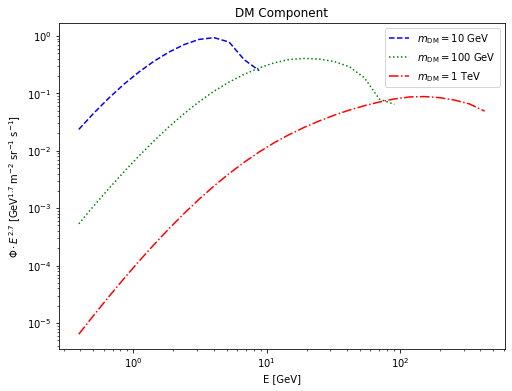

In [4]:
# Compare the DM component of the antiproton flux for different DM masses

out = DRN.predict(["DM Antiprotons"], test_pp, DM_mass= test_mDM, DM_fs = test_fs)

DM_flux, DM_E = out[0]

plt.figure(figsize=(8,6))
plt.title('DM Component')
plt.plot(DM_E[DM_E<test_mDM[0]], (DM_E**2.7 * DM_flux[0])[DM_E<test_mDM[0]], c = 'b', linestyle = 'dashed', label = r'$m_\mathrm{DM} = 10$ GeV')
plt.plot(DM_E[DM_E<test_mDM[1]], (DM_E**2.7 * DM_flux[1])[DM_E<test_mDM[1]], c = 'g', linestyle = 'dotted', label = r'$m_\mathrm{DM} = 100$ GeV')
plt.plot(DM_E[DM_E<test_mDM[2]], (DM_E**2.7 * DM_flux[2])[DM_E<test_mDM[2]], c = 'r', linestyle = 'dashdot', label = r'$m_\mathrm{DM} = 1$ TeV')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()


**Second example: Primary spectra**

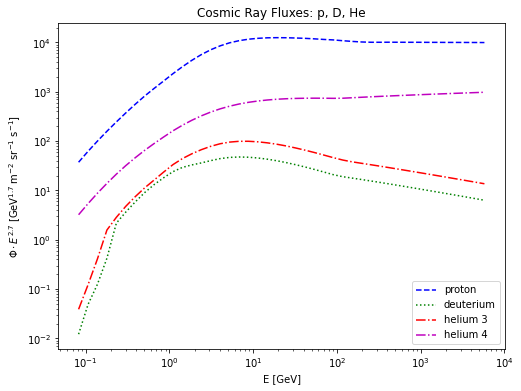

In [6]:
particles=['Protons', 'Deuterium', 'Helium 3', 'Helium 4']
out = DRN.predict(particles, test_pp[0], DM_mass= None, DM_fs = None)

p_flux, p_E = out[0]
d_flux, d_E = out[1]
He3_flux, He3_E=out[2]
He4_flux, He4_E=out[3]

plt.figure(figsize=(8,6))
plt.title('Cosmic Ray Fluxes: p, D, He')
plt.plot(p_E, p_E**2.7 * p_flux, c = 'b', linestyle = 'dashed', label = 'proton')
plt.plot(d_E, d_E**2.7 * d_flux, c = 'g', linestyle = 'dotted', label = 'deuterium')
plt.plot(He3_E, He3_E**2.7 * He3_flux, c = 'r', linestyle = '-.', label = 'helium 3')
plt.plot(He4_E, He4_E**2.7 * He4_flux, c = 'm', linestyle = '-.', label = 'helium 4')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.ylabel('$\Phi \cdot E^{2.7}$ [GeV$^{1.7}$ m$^{-2}$ sr$^{-1}$ s$^{-1}$]')
plt.xlabel('E [GeV]')
plt.show()
